# Metody Inteligencji Obliczeniowej w Analizie Danych

[Tasks](https://pages.mini.pw.edu.pl/~karwowskij/mioad/lab-sieci.html)

### Lab 5: NN4: Rozwiązywanie zadania klasyfikacji (1 tydzień, 2 punkty)

Zaimplementować funkcję softmax dla warstwy wyjściowej sieci neuronowej. Sprawdzić szybkość i
skuteczność w wariancie, gdy sieć używa funkcji softmax na ostatniej warstwie i gdy jest użyta zwykła
funkcja aktywacji. 

**Softmax wymaga też odpowiednich zmian w algorytmie uczenia, uwzględniających
pochodną fukcji.**

Przeprowadzić eksperymenty na zbiorach (w nawiasach wymagana wartość F-measure na 2 punkty):
- rings3-regular (F-measure: 0.75),
- easy (F-measure: 0.99),
- xor3 (F-measure: 0.97).

#### TODO:

- implement softmax with derivative
- compare training speed and accuracy with and without softmax at the last layer


In [1]:
import MultiLayerPerceptron as mlp
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def plot_good_vs_bad_predictions(network, x_test, y_test):
    pred_class = np.argmax(network.predict(x_test), axis=1)
    real_class = np.array(y_test).argmax(axis=1)
    is_good_prediction = real_class == pred_class
    
    fig, (axes_1, axes_2, axes_3) = plt.subplots(1, 3,figsize=(12, 4))
    sns.scatterplot(x=np.array(x_test)[:,0], y=np.array(x_test)[:,1], hue=real_class, ax=axes_1)
    axes_1.set_title("Real classes")
    sns.scatterplot(x=np.array(x_test)[:,0], y=np.array(x_test)[:,1], hue=pred_class, ax=axes_2)
    axes_2.set_title("Predicted classes")
    sns.scatterplot(x=np.array(x_test)[:,0], y=np.array(x_test)[:,1], hue=is_good_prediction, ax=axes_3)
    axes_3.set_title("Good vs Bad Predictions")
    plt.show()

## Dataset 1: rings3-regular

In [3]:
df_train = pd.read_csv('data/classification/rings3-regular-training.csv').sample(frac=1)
df_test = pd.read_csv('data/classification/rings3-regular-test.csv').sample(frac=1)
print(df_test.head())

# onehot encoding
x_train = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_train = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()
x_test = df_test.loc[:,df_test.columns!='c'].to_numpy().tolist()
y_test = pd.get_dummies(df_test.loc[:,df_test.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()

print(f"\nUnique classes: {np.unique(y_train)}")

              x          y  c
606   -9.365685  81.223996  2
1522  31.205199  70.894251  1
347    4.147321 -54.138030  1
181  -92.183438 -15.053963  2
437  -22.879947  86.447469  2

Unique classes: [0 1]


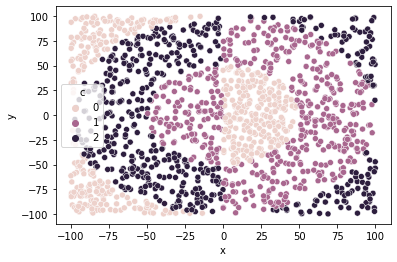

In [4]:
sns.scatterplot(data=df_train, x='x', y='y', hue='c');

#### Model 1 - without softmax

In [7]:
net1_1 = mlp.NeuralNetwork()
net1_1.add(mlp.Layer(2))
net1_1.add(mlp.Layer(20, activation_fun=mlp.ActivationSigmoid()))
net1_1.add(mlp.Layer(20, activation_fun=mlp.ActivationSigmoid()))
net1_1.add(mlp.Layer(20, activation_fun=mlp.ActivationSigmoid()))
net1_1.add(mlp.Layer(3, activation_fun=mlp.ActivationSigmoid(), add_bias=False))

In [10]:
net1_1.train(x_train, y_train, x_test, y_test, epochs=50, learning_rate=0.003, batch_size=5, with_f1_macro=True)

Epoch:    1/50,  MSE loss train:    0.221,  loss test:     0.22
	F1 macro train:    0.373,  F1 macro test:    0.362
Epoch:    6/50,  MSE loss train:     0.22,  loss test:     0.22
	F1 macro train:    0.383,  F1 macro test:    0.364
Epoch:   11/50,  MSE loss train:     0.22,  loss test:     0.22
	F1 macro train:    0.385,  F1 macro test:    0.366
Epoch:   16/50,  MSE loss train:     0.22,  loss test:     0.22
	F1 macro train:    0.386,  F1 macro test:    0.367
Epoch:   21/50,  MSE loss train:     0.22,  loss test:    0.219
	F1 macro train:    0.385,  F1 macro test:     0.37
Epoch:   26/50,  MSE loss train:     0.22,  loss test:    0.219
	F1 macro train:    0.385,  F1 macro test:    0.371
Epoch:   31/50,  MSE loss train:    0.219,  loss test:    0.219
	F1 macro train:    0.386,  F1 macro test:    0.372
Epoch:   36/50,  MSE loss train:    0.219,  loss test:    0.218
	F1 macro train:    0.389,  F1 macro test:    0.376
Epoch:   41/50,  MSE loss train:    0.219,  loss test:    0.218
	F1 macr

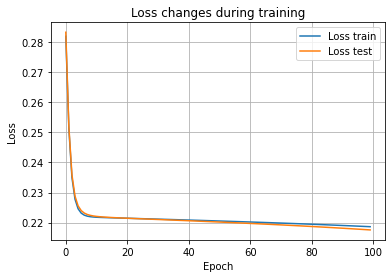

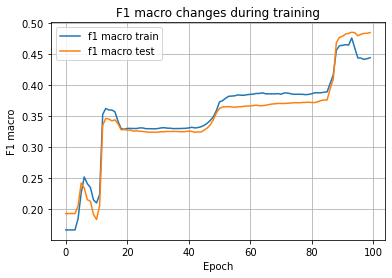

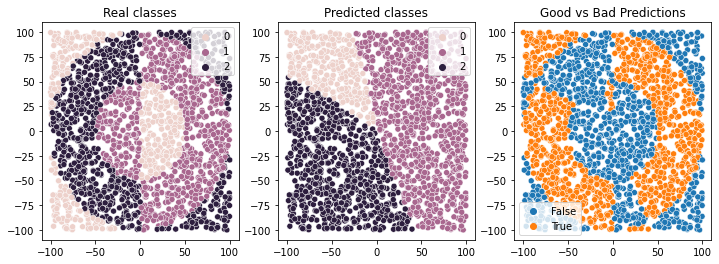

In [11]:
net1_1.plot_training_history()
plot_good_vs_bad_predictions(net1_1, x_test, y_test)

#### Model 2 - with softmax

In [12]:
net1_2 = mlp.NeuralNetwork()
net1_2.add(mlp.Layer(2))
net1_2.add(mlp.Layer(20, activation_fun=mlp.ActivationSigmoid()))
net1_2.add(mlp.Layer(20, activation_fun=mlp.ActivationSigmoid()))
net1_2.add(mlp.Layer(20, activation_fun=mlp.ActivationSigmoid()))
net1_2.add(mlp.Layer(3, activation_fun=mlp.ActivationSoftmax(), add_bias=False))

In [13]:
net1_2.train(x_train, y_train, x_test, y_test, epochs=100, learning_rate=0.03,\
            batch_size=10, loss_function=mlp.LossCrossEntropy(), with_f1_macro=True)

c:\Users\matem\PycharmProjects\miowad\MultiLayerPerceptron.py:294: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


Epoch:    1/100,  CrossEntropy loss train:   18.451,  loss test:    18.04
	F1 macro train:    0.167,  F1 macro test:    0.193
Epoch:   11/100,  CrossEntropy loss train:   17.469,  loss test:   17.285
	F1 macro train:    0.419,  F1 macro test:     0.46
Epoch:   21/100,  CrossEntropy loss train:   16.938,  loss test:   16.668
	F1 macro train:    0.418,  F1 macro test:    0.461
Epoch:   31/100,  CrossEntropy loss train:   16.718,  loss test:   16.461
	F1 macro train:    0.482,  F1 macro test:    0.544
Epoch:   41/100,  CrossEntropy loss train:   16.323,  loss test:   16.073
	F1 macro train:    0.554,  F1 macro test:    0.567
Epoch:   51/100,  CrossEntropy loss train:    15.98,  loss test:   15.715
	F1 macro train:    0.536,  F1 macro test:    0.549
Epoch:   61/100,  CrossEntropy loss train:   15.725,  loss test:   15.475
	F1 macro train:    0.542,  F1 macro test:    0.552
Epoch:   71/100,  CrossEntropy loss train:    15.61,  loss test:   15.395
	F1 macro train:    0.542,  F1 macro test:  

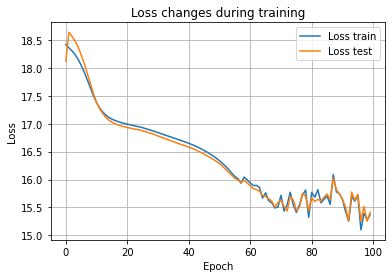

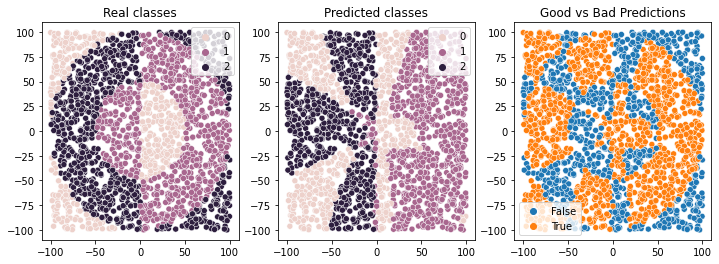

In [53]:
net1_2.plot_training_history()
plot_good_vs_bad_predictions(net1_2, x_test, y_test)

## Dataset 2: easy

In [14]:
df_train = pd.read_csv('data/classification/easy-training.csv')
df_test = pd.read_csv('data/classification/easy-test.csv')
print(df_test.head())

x_train = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_train = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()
x_test = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_test = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()

print(f"\n Unique classes: {np.unique(y_train)}")

           x          y      c
0  88.836312  35.105689   True
1   8.454690  57.210448  False
2 -57.221426  29.312467  False
3 -11.922723 -88.264355   True
4   8.885765   6.605795   True

 Unique classes: [0 1]


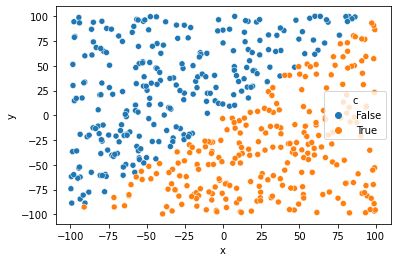

In [15]:
sns.scatterplot(data=df_train, x='x', y='y', hue='c');

#### Model 1 - without softmax

In [16]:
net2_1 = mlp.NeuralNetwork()
net2_1.add(mlp.Layer(2))
net2_1.add(mlp.Layer(5, activation_fun=mlp.ActivationSigmoid()))
net2_1.add(mlp.Layer(5, activation_fun=mlp.ActivationSigmoid()))
net2_1.add(mlp.Layer(2, activation_fun=mlp.ActivationSigmoid(), add_bias=False))

In [17]:
net2_1.train(x_train, y_train, x_test, y_test, epochs=100, learning_rate=0.03, batch_size=5, with_f1_macro=True)

c:\Users\matem\PycharmProjects\miowad\MultiLayerPerceptron.py:294: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


Epoch:    1/100,  MSE loss train:    0.342,  loss test:    0.342
	F1 macro train:    0.333,  F1 macro test:    0.333
Epoch:   11/100,  MSE loss train:    0.223,  loss test:    0.223
	F1 macro train:    0.333,  F1 macro test:    0.333
Epoch:   21/100,  MSE loss train:     0.12,  loss test:     0.12
	F1 macro train:    0.992,  F1 macro test:    0.992
Epoch:   31/100,  MSE loss train:    0.045,  loss test:    0.045
	F1 macro train:    0.994,  F1 macro test:    0.994
Epoch:   41/100,  MSE loss train:    0.023,  loss test:    0.023
	F1 macro train:      1.0,  F1 macro test:      1.0
Epoch:   51/100,  MSE loss train:    0.014,  loss test:    0.014
	F1 macro train:    0.998,  F1 macro test:    0.998
Epoch:   61/100,  MSE loss train:     0.01,  loss test:     0.01
	F1 macro train:      1.0,  F1 macro test:      1.0
Epoch:   71/100,  MSE loss train:    0.009,  loss test:    0.009
	F1 macro train:      1.0,  F1 macro test:      1.0
Epoch:   81/100,  MSE loss train:    0.007,  loss test:    0.007

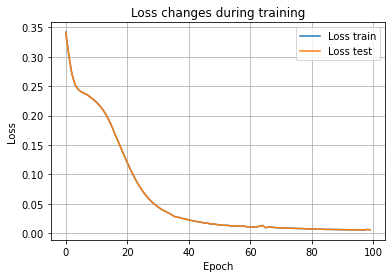

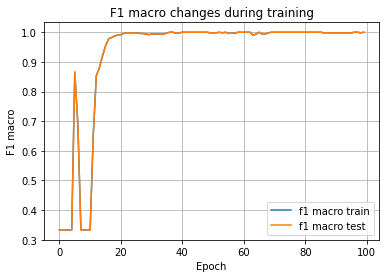

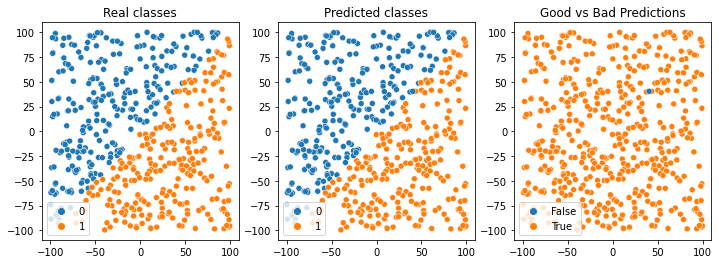

In [18]:
net2_1.plot_training_history()
plot_good_vs_bad_predictions(net2_1, x_test, y_test)

#### Model 2 - with softmax

In [19]:
net2_2 = mlp.NeuralNetwork()
net2_2.add(mlp.Layer(2))
net2_2.add(mlp.Layer(5, activation_fun=mlp.ActivationSigmoid()))
net2_2.add(mlp.Layer(5, activation_fun=mlp.ActivationSigmoid()))
net2_2.add(mlp.Layer(3, activation_fun=mlp.ActivationSoftmax(), add_bias=False))

In [20]:
net2_2.train(x_train, y_train, x_test, y_test, epochs=100, learning_rate=0.003, \
            batch_size=5, loss_function=mlp.LossCrossEntropy(), with_f1_macro=True)

Epoch:    1/100,  CrossEntropy loss train:     1.79,  loss test:     1.79
	F1 macro train:    0.998,  F1 macro test:    0.998
Epoch:   11/100,  CrossEntropy loss train:     1.57,  loss test:     1.57
	F1 macro train:     0.99,  F1 macro test:     0.99
Epoch:   21/100,  CrossEntropy loss train:     1.43,  loss test:     1.43
	F1 macro train:     0.99,  F1 macro test:     0.99
Epoch:   31/100,  CrossEntropy loss train:    1.275,  loss test:    1.275
	F1 macro train:     0.99,  F1 macro test:     0.99
Epoch:   41/100,  CrossEntropy loss train:    1.183,  loss test:    1.183
	F1 macro train:     0.99,  F1 macro test:     0.99
Epoch:   51/100,  CrossEntropy loss train:    1.108,  loss test:    1.108
	F1 macro train:    0.992,  F1 macro test:    0.992
Epoch:   61/100,  CrossEntropy loss train:    1.052,  loss test:    1.052
	F1 macro train:     0.99,  F1 macro test:     0.99
Epoch:   71/100,  CrossEntropy loss train:    1.005,  loss test:    1.005
	F1 macro train:     0.99,  F1 macro test:  

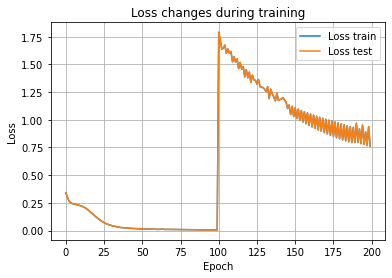

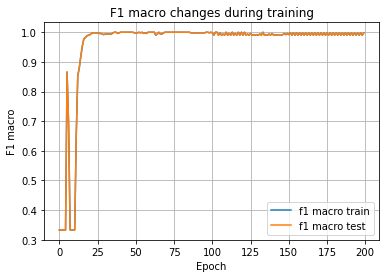

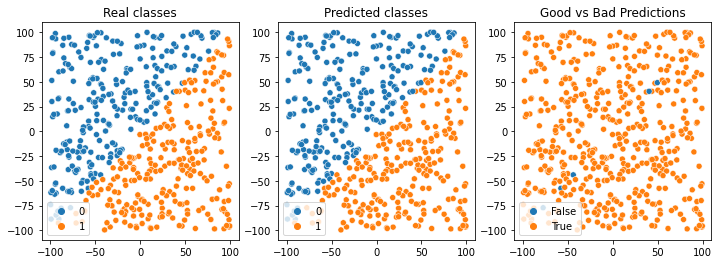

In [21]:
net2_2.plot_training_history()
plot_good_vs_bad_predictions(net2_2, x_test, y_test)

## Dataset 3: xor3

In [28]:
df_train = pd.read_csv('data/classification/xor3-training.csv')
df_test = pd.read_csv('data/classification/xor3-test.csv')
print(df_test.head())

x_train = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_train = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()
x_test = df_train.loc[:,df_train.columns!='c'].to_numpy().tolist()
y_test = pd.get_dummies(df_train.loc[:,df_train.columns=='c'].squeeze(axis=1), prefix='class').to_numpy().tolist()

print(f"\nUnique classes: {np.unique(y_train)}")

           x          y  c
0  36.973203 -55.586985  0
1  39.495972  78.216447  0
2  78.443533  77.156005  0
3   9.559384  -6.161679  0
4  42.216651  48.249953  0

Unique classes: [0 1]


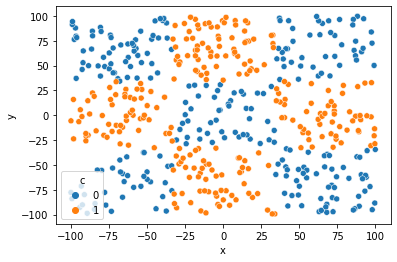

In [29]:
import seaborn as sns
sns.scatterplot(data=df_train, x='x', y='y', hue='c');

#### Model 1 - without softmax

In [30]:
net3_1 = mlp.NeuralNetwork()
net3_1.add(mlp.Layer(2))
net3_1.add(mlp.Layer(5, activation_fun=mlp.ActivationSigmoid()))
net3_1.add(mlp.Layer(5, activation_fun=mlp.ActivationSigmoid()))
net3_1.add(mlp.Layer(2, activation_fun=mlp.ActivationSigmoid(), add_bias=False))

In [31]:
net3_1.train(x_train, y_train, x_test, y_test, epochs=100, learning_rate=0.03, batch_size=5, with_f1_macro=True)

c:\Users\matem\PycharmProjects\miowad\MultiLayerPerceptron.py:294: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP/(TP+FP)


Epoch:    1/100,  MSE loss train:    0.285,  loss test:    0.285
	F1 macro train:    0.333,  F1 macro test:    0.333
Epoch:   11/100,  MSE loss train:    0.253,  loss test:    0.253
	F1 macro train:    0.333,  F1 macro test:    0.333
Epoch:   21/100,  MSE loss train:    0.253,  loss test:    0.253
	F1 macro train:    0.333,  F1 macro test:    0.333
Epoch:   31/100,  MSE loss train:    0.253,  loss test:    0.253
	F1 macro train:    0.333,  F1 macro test:    0.333
Epoch:   41/100,  MSE loss train:    0.252,  loss test:    0.252
	F1 macro train:    0.333,  F1 macro test:    0.333
Epoch:   51/100,  MSE loss train:    0.252,  loss test:    0.252
	F1 macro train:    0.333,  F1 macro test:    0.333
Epoch:   61/100,  MSE loss train:    0.252,  loss test:    0.252
	F1 macro train:    0.333,  F1 macro test:    0.333
Epoch:   71/100,  MSE loss train:    0.251,  loss test:    0.251
	F1 macro train:    0.333,  F1 macro test:    0.333
Epoch:   81/100,  MSE loss train:    0.251,  loss test:    0.251

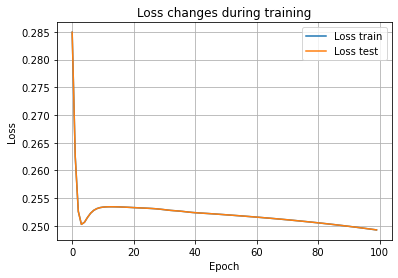

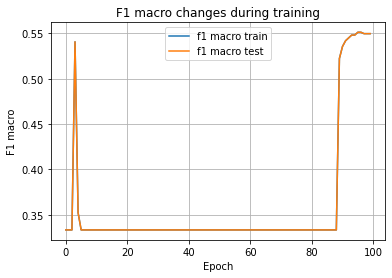

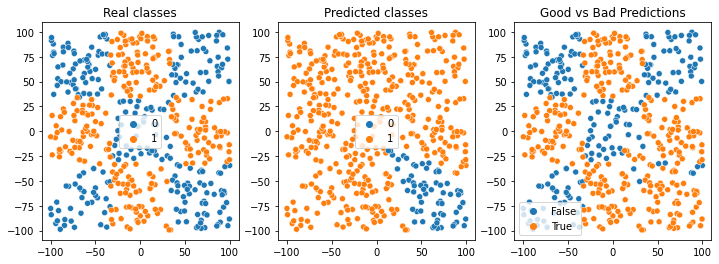

In [32]:
net3_1.plot_training_history()
plot_good_vs_bad_predictions(net3_1, x_test, y_test)

#### Model 2 - with softmax

In [37]:
net3_2 = mlp.NeuralNetwork()
net3_2.add(mlp.Layer(2))
net3_2.add(mlp.Layer(10, activation_fun=mlp.ActivationSigmoid()))
net3_2.add(mlp.Layer(10, activation_fun=mlp.ActivationSigmoid()))
net3_2.add(mlp.Layer(2, activation_fun=mlp.ActivationSoftmax(), add_bias=False))

In [40]:
net3_2.train(x_train, y_train, x_test, y_test, epochs=100, learning_rate=0.1, \
            batch_size=5,loss_function=mlp.LossCrossEntropy(), with_f1_macro=True)

Epoch:    1/100,  CrossEntropy loss train:   11.901,  loss test:   11.901
	F1 macro train:    0.468,  F1 macro test:    0.468
Epoch:   11/100,  CrossEntropy loss train:   11.434,  loss test:   11.434
	F1 macro train:    0.545,  F1 macro test:    0.545
Epoch:   21/100,  CrossEntropy loss train:   11.636,  loss test:   11.636
	F1 macro train:    0.494,  F1 macro test:    0.494
Epoch:   31/100,  CrossEntropy loss train:   11.005,  loss test:   11.005
	F1 macro train:    0.531,  F1 macro test:    0.531
Epoch:   41/100,  CrossEntropy loss train:   10.873,  loss test:   10.873
	F1 macro train:    0.531,  F1 macro test:    0.531
Epoch:   51/100,  CrossEntropy loss train:   10.567,  loss test:   10.567
	F1 macro train:    0.534,  F1 macro test:    0.534
Epoch:   61/100,  CrossEntropy loss train:   10.578,  loss test:   10.578
	F1 macro train:    0.531,  F1 macro test:    0.531
Epoch:   71/100,  CrossEntropy loss train:   10.471,  loss test:   10.471
	F1 macro train:    0.622,  F1 macro test:  

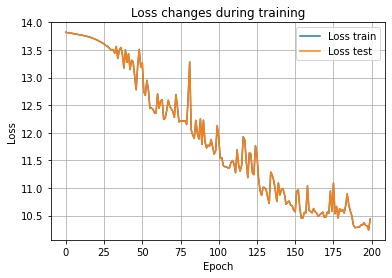

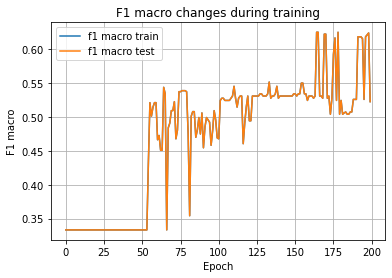

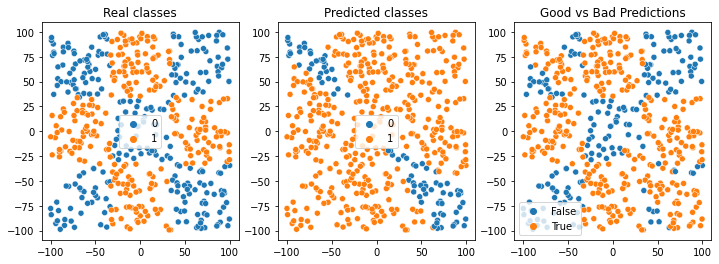

In [41]:
net3_2.plot_training_history()
plot_good_vs_bad_predictions(net3_2, x_test, y_test)

## Summary